In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,confusion_matrix,accuracy_score,recall_score,f1_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
# ^ Create a small dataset
data = {
    "weather": [
        "sunny",
        "sunny",
        "sunny",
        "rainy",
        "rainy",
        "rainy",
        "rainy",
        "sunny",
        "sunny",
        "rainy",
        "sunny",
        "sunny",
        "rainy",
        "rainy",
    ],
    "windy": [
        False,
        True,
        False,
        False,
        False,
        True,
        True,
        False,
        False,
        False,
        True,
        True,
        False,
        True,
    ],
    "play": [
        "no",
        "no",
        "yes",
        "yes",
        "yes",
        "no",
        "yes",
        "no",
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "no",
    ],
}

df = pd.DataFrame(data)
print(df)

   weather  windy play
0    sunny  False   no
1    sunny   True   no
2    sunny  False  yes
3    rainy  False  yes
4    rainy  False  yes
5    rainy   True   no
6    rainy   True  yes
7    sunny  False   no
8    sunny  False  yes
9    rainy  False  yes
10   sunny   True  yes
11   sunny   True  yes
12   rainy  False  yes
13   rainy   True   no


In [12]:

# ^ Encode categorical features 
df['weather'] = df['weather'].map({'sunny': 1, 'rainy': 0})
df['play'] = df['play'].map({'yes': 1, 'no': 0})
df['windy'] = df['windy'].astype(int)

X = df[['weather', 'windy']]
y = df['play']


In [13]:

# ^ Train a simple decision tree
tree = DecisionTreeRegressor(max_depth=3,random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

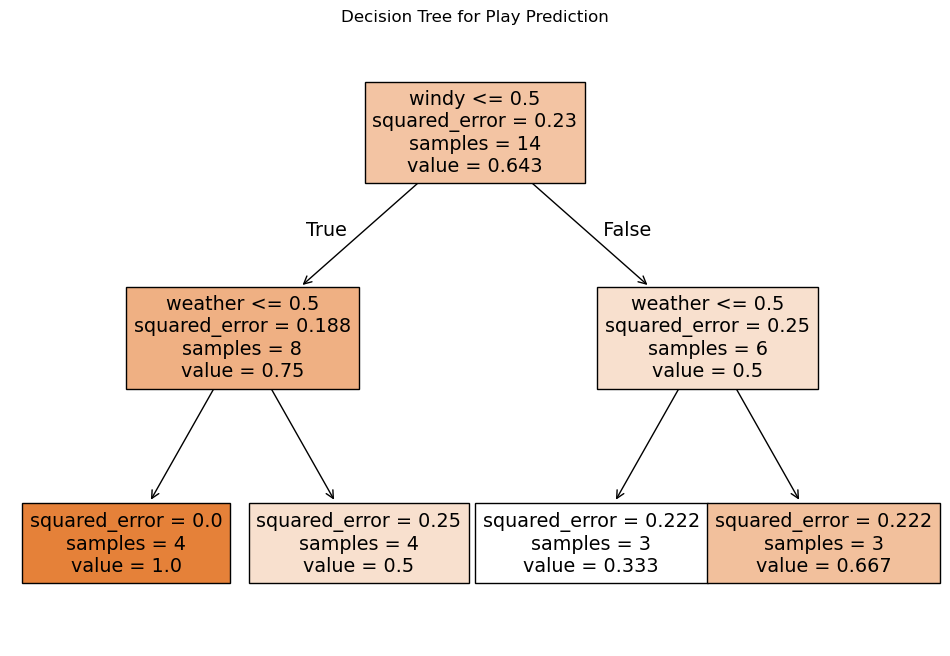

In [15]:

# ^ Visualize the decision tree
from sklearn.tree import  plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.title("Decision Tree for Play Prediction")
plt.show()

